<a href="https://colab.research.google.com/github/Nazneen-akram/NED-Data-Science-Artificial-Intelligence/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [10]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.2981 - accuracy: 0.9161 - val_loss: 0.1483 - val_accuracy: 0.9573
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1228 - accuracy: 0.9641 - val_loss: 0.1085 - val_accuracy: 0.9693
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0807 - accuracy: 0.9765 - val_loss: 0.0913 - val_accuracy: 0.9732
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9828 - val_loss: 0.0895 - val_accuracy: 0.9742
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0799 - val_accuracy: 0.9763
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0781 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9932 - val_loss: 0.0795 - val_accuracy: 0.9772
Epoch 

**Plotting a validation accuracy comparison**

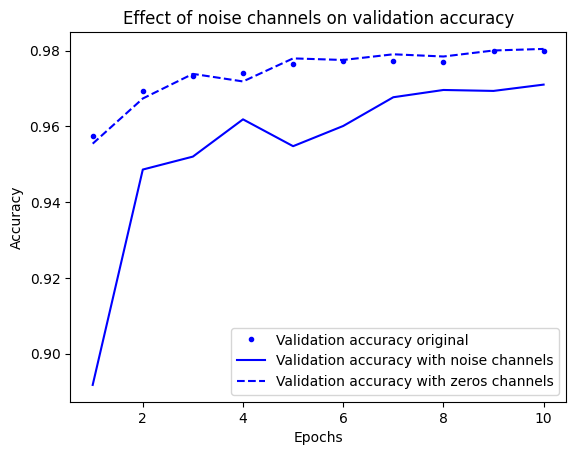

In [ ]:
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc, "b.",
         label="Validation accuracy original")
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history= model.fit(train_images, random_train_labels,
          epochs=30,
          batch_size=128,
          validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 2.3144 - accuracy: 0.1023 - val_loss: 2.3034 - val_accuracy: 0.1047
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2995 - accuracy: 0.1176 - val_loss: 2.3108 - val_accuracy: 0.1094
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2920 - accuracy: 0.1262 - val_loss: 2.3148 - val_accuracy: 0.1011
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2803 - accuracy: 0.1354 - val_loss: 2.3232 - val_accuracy: 0.1004
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2660 - accuracy: 0.1478 - val_loss: 2.3360 - val_accuracy: 0.1077
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2483 - accuracy: 0.1611 - val_loss: 2.3442 - val_accuracy: 0.1044
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 2.2238 - accuracy: 0.1774 - val_loss: 2.3556 - val_accuracy: 0.1076
Epoch 

** As it turns out, the nature of generalization in deep learning has rather little to do
with deep learning models themselves, and much to do with the structure of information in the real world. Let’s take a look at what’s really going on here**

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):

    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    train_acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    # Sample data (replace with your actual data)
    epochs = range(1, len(train_loss) + 1)
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True)

    # Plot loss on the upper subplot
    ax1.set_ylabel('Loss', color='tab:red')
    ax1.plot(epochs, train_loss, color='tab:blue', label='Training Loss')
    ax1.plot(epochs, val_loss, color='tab:red', label='Validation Loss')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.legend(loc='upper left')

    # Plot accuracy on the lower subplot
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy', color='tab:green')
    ax2.plot(epochs, [acc * 100 for acc in train_acc], color='tab:blue', label='Training Accuracy (%)')
    ax2.plot(epochs, [acc * 100 for acc in val_acc], color='tab:red', label='Validation Accuracy (%)')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_ylim(0, 100)
    ax2.legend(loc='upper left')

    ax2.yaxis.set_label_position('right')  # Set the y-axis label to the right
    ax2.yaxis.set_ticks_position('right')  # Set the y-axis ticks to the right

    # Add a title
    plt.suptitle('Training and Validation Loss & Accuracy Over Epochs')

    # Display the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

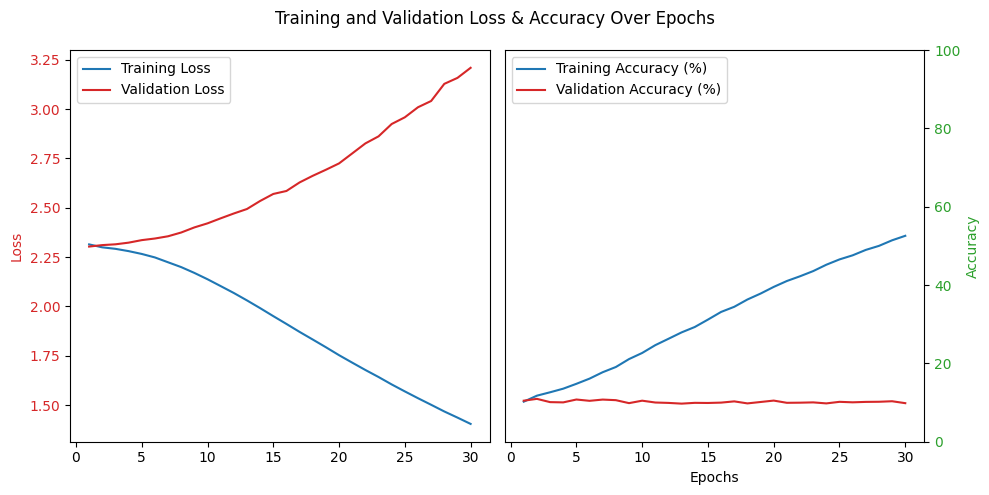

In [ ]:
plot_history(history)

## The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline (give example like mcqs)

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 485.1421 - accuracy: 0.3393 - val_loss: 2.1473 - val_accuracy: 0.1796
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 2.6951 - accuracy: 0.2225 - val_loss: 2.2042 - val_accuracy: 0.2108
Epoch 3/10
375/375 [==============================] - 4s 9ms/step - loss: 2.4912 - accuracy: 0.2111 - val_loss: 2.1050 - val_accuracy: 0.1932
Epoch 4/10
375/375 [==============================] - 7s 18ms/step - loss: 2.4630 - accuracy: 0.2013 - val_loss: 2.1749 - val_accuracy: 0.1892
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 2.4801 - accuracy: 0.1827 - val_loss: 2.2008 - val_accuracy: 0.1920
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 2.3755 - accuracy: 0.1854 - val_loss: 2.1790 - val_accuracy: 0.1755
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 2.3243 - accuracy: 0.1917 - val_loss: 2.1969 - val_accuracy: 0.1909

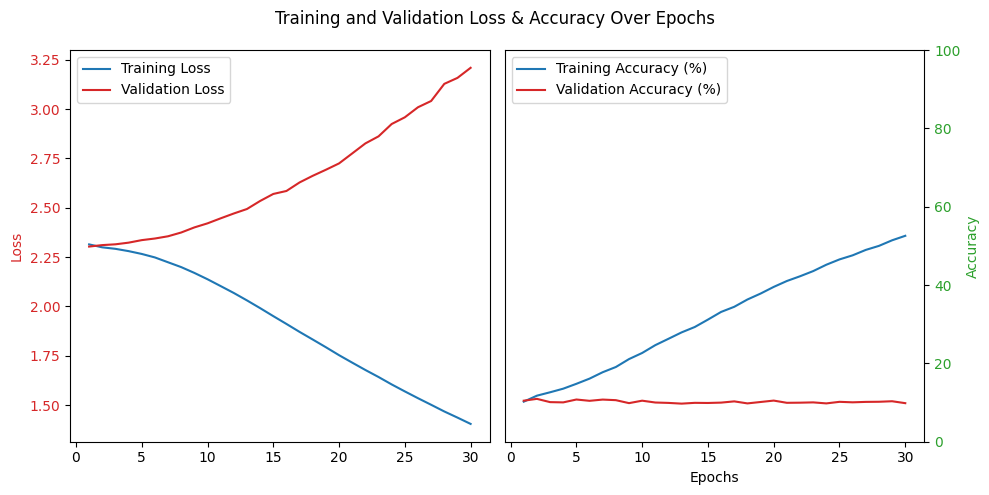

In [ ]:
plot_history(history)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2892 - accuracy: 0.9167 - val_loss: 0.1518 - val_accuracy: 0.9569
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1219 - accuracy: 0.9643 - val_loss: 0.1144 - val_accuracy: 0.9650
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0805 - accuracy: 0.9762 - val_loss: 0.0912 - val_accuracy: 0.9743
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9829 - val_loss: 0.0847 - val_accuracy: 0.9740
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0745 - val_accuracy: 0.9784
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.0772 - val_accuracy: 0.9776
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.0808 - val_accuracy: 0.9771
Epoch 

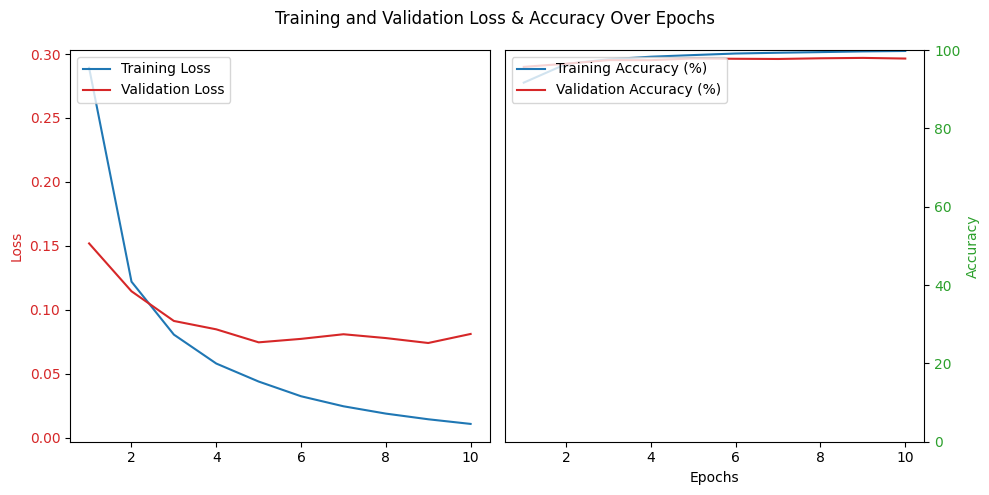

In [ ]:
plot_history(history)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6626 - accuracy: 0.8400 - val_loss: 0.3599 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.9034 - val_loss: 0.3082 - val_accuracy: 0.9158
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.9116 - val_loss: 0.2933 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3016 - accuracy: 0.9168 - val_loss: 0.2826 - val_accuracy: 0.9218
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2920 - accuracy: 0.9185 - val_loss: 0.2786 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2852 - accuracy: 0.9203 - val_loss: 0.2754 - val_accuracy: 0.9269
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.9218 - val_loss: 0.2720 - val_accuracy: 0.9257
Epoch 

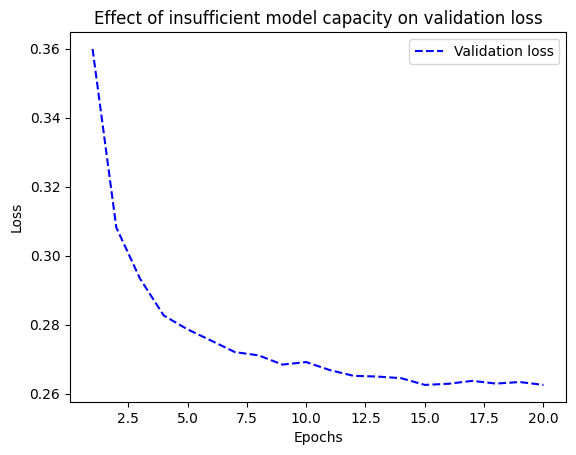

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3683 - accuracy: 0.8949 - val_loss: 0.1902 - val_accuracy: 0.9452
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1639 - accuracy: 0.9515 - val_loss: 0.1462 - val_accuracy: 0.9555
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1163 - accuracy: 0.9648 - val_loss: 0.1146 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0901 - accuracy: 0.9728 - val_loss: 0.1179 - val_accuracy: 0.9646
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0727 - accuracy: 0.9783 - val_loss: 0.1010 - val_accuracy: 0.9697
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0595 - accuracy: 0.9818 - val_loss: 0.1018 - val_accuracy: 0.9684
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0954 - val_accuracy: 0.9728
Epoch 

## Improving generalization

> Make sure you have enough data. Remember that you need a dense sampling of
the input-cross-output space. More data will yield a better model. Sometimes,
problems that seem impossible at first become solvable with a larger dataset.
* Minimize labeling errors—visualize your inputs to check for anomalies, and
proofread your labels.
* Clean your data and deal with missing values (we’ll cover this in the next chapter).
* If you have many features and you aren’t sure which ones are actually useful, do
feature selection.
A particularly important way to improve the generalization potential of your data is
feature engineering. For most machine learning problems, feature engineering is a key
ingredient for success



### Dataset curation

### Feature engineering


> Feature engineering is the process of using your own knowledge about the data and about
the machine learning algorithm at hand (in this case, a neural network) to make the
algorithm work better by applying hardcoded (non-learned) transformations to the
data before it goes into the model. In many cases, it isn’t reasonable to expect a
machine learning model to be able to learn from completely arbitrary data. The data
needs to be presented to the model in a way that will make the model’s job easier.



> Does this mean you don’t have to worry about feature engineering as
long as you’re using deep neural networks? No, for two reasons:
* Good features still allow you to solve problems more elegantly while using fewer
resources. For instance, it would be ridiculous to solve the problem of reading a
clock face using a convolutional neural network.
* Good features let you solve a problem with far less data. The ability of deep
learning models to learn features on their own relies on having lots of training
data available; if you have only a few samples, the information value in their features becomes critical.





### Using early stopping


> you could just save your model at the end of each
epoch, and once you’ve found the best epoch, reuse the closest saved model you have.
In Keras, it’s typical to do this with an EarlyStopping callback, which will interrupt
training as soon as validation metrics have stopped improving, while remembering the
best known model state.



### Regularizing your model


> Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation. This is called “regularizing” the model, because it tends to make
the model simpler, more “regular,” its curve smoother, more “generic”; thus it is less
specific to the training set and better able to generalize by more closely approximating the latent manifold of the data.



#### Reducing the network's size


>  a model that is too small will not overfit. The simplest way
to mitigate overfitting is to reduce the size of the model (the number of learnable
parameters in the model, determined by the number of layers and the number of
units per layer). If the model has limited memorization resources, it won’t be able to
simply memorize its training data; thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same
time, keep in mind that you should use models that have enough parameters that they
don’t underfit: your model shouldn’t be starved for memorization resources. There is
a compromise to be found between too much capacity and not enough capacity.



**Original model**

In [15]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.5610 - accuracy: 0.7498 - val_loss: 0.4236 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3489 - accuracy: 0.8851 - val_loss: 0.3489 - val_accuracy: 0.8677
Epoch 3/20
30/30 [==============================] - 8s 260ms/step - loss: 0.2537 - accuracy: 0.9161 - val_loss: 0.2858 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2024 - accuracy: 0.9327 - val_loss: 0.2768 - val_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1639 - accuracy: 0.9473 - val_loss: 0.2825 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1392 - accuracy: 0.9555 - val_loss: 0.3123 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1191 - accura

**Version of the model with lower capacity**

In [2]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: ignored

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [3]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [7]:
from tensorflow import keras
from keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: ignored

## Summary